# 1. Feature Importance Extraction
This step extracts and visualizes the importance of each feature used by the trained Gradient Boosting model.
Feature importance helps to understand which clinical indicators contribute most to predicting diabetic status.


In [11]:
# -----------------------------
# Run preprocessing to load X and y
# -----------------------------
%run ./Preprocessing.ipynb  

import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Preprocessed data saved as joblib files!


## 2 Load Trained Gradient Boosting Model
The trained model is loaded from the saved pipeline file (`gb_diabetes_model.joblib`). 
If it was saved as a pipeline, the classifier is accessed from the pipeline's `named_steps`.


In [13]:
gb_model = joblib.load("gb_diabetes_model.joblib")  # replace with your correct path

if hasattr(gb_model, 'named_steps'):
    importances = gb_model.named_steps['classifier'].feature_importances_
else:
    importances = gb_model.feature_importances_


## 3 Check Feature-Importance Alignment
Ensure that the number of features in `X` matches the length of feature importances.
If there is a mismatch, only the corresponding features are used.


In [14]:
# Debug: check lengths
print("Feature importances length:", len(importances))
print("Number of columns in X:", len(X.columns))
print("Columns in X:", X.columns.tolist())

# Match features if lengths mismatch
if len(importances) != len(X.columns):
    X_used = X.iloc[:, :len(importances)]
else:
    X_used = X


Feature importances length: 9
Number of columns in X: 11
Columns in X: ['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']


## 4 Create Feature Importance Series
A pandas Series is created to sort and display features based on importance scores.


In [16]:
# Create pandas Series and sort
feat_importances = pd.Series(importances, index=X_used.columns).sort_values(ascending=False)

# Display feature importances
print("\nFeature Importances:")
print(feat_importances)



Feature Importances:
Gender    0.548344
AGE       0.242255
Urea      0.080811
Chol      0.042091
HbA1c     0.020637
TG        0.020057
Cr        0.018781
HDL       0.014696
LDL       0.012328
dtype: float64


## 9.4 Plot Feature Importances
Visualize the importance of each feature using a horizontal bar chart.
This helps to quickly identify the most influential clinical indicators.


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16580\3516324627.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="viridis")


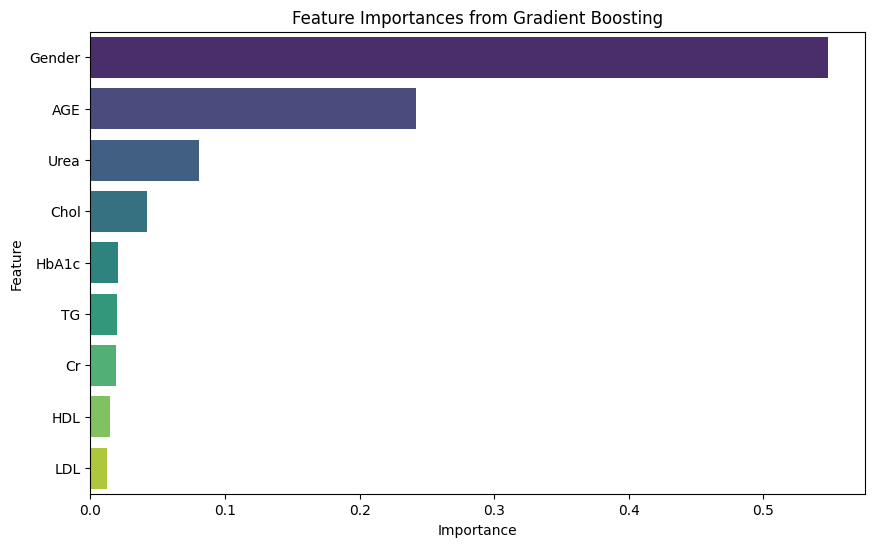

In [18]:
# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index, palette="viridis")
plt.title("Feature Importances from Gradient Boosting")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


# Comparison of Model

| Model               | Before Tuning Accuracy | After Tuning Accuracy | Before Tuning F1\_macro | After Tuning F1\_macro |
| ------------------- | ---------------------- | --------------------- | ----------------------- | ---------------------- |
| Random Forest       | 0.9811                 | 0.9811                | 0.98                    | 0.9837                 |
| Logistic Regression | 0.9245                 | 0.9434                | 0.89                    | 0.92                   |
| XGBoost             | 0.9623                 | 0.9623                | 0.96                    | 0.96                   |
| Gradient Boosting   | 0.9623                 | 0.9811                | 0.96                    | 0.9902                 |


## 🔍 Detailed Analysis

1. **Random Forest**  
   - Accuracy remained constant at 0.9811 after tuning, while macro F1 improved slightly to 0.9837.  
   - Strong baseline model, but limited improvement through hyperparameter tuning indicates it is already close to its optimal configuration.

2. **Logistic Regression**  
   - Accuracy increased from 0.9245 to 0.9434 after tuning, and macro F1 improved from 0.89 to 0.92.  
   - Linear model struggles with complex nonlinear relationships in the dataset, so while tuning helps, it cannot outperform tree-based models.

3. **XGBoost**  
   - Accuracy and F1 remained stable at 0.9623 and 0.96 respectively.  
   - Performs well, but no significant improvement after tuning. Slight underperformance compared to Random Forest and Gradient Boosting.

4. **Gradient Boosting**  
   - Accuracy improved significantly from 0.9623 to 0.9811 after tuning, and macro F1 increased to 0.9902.  
   - Best trade-off between **overall accuracy** and **class-wise performance**.  
   - Capable of capturing complex nonlinear patterns in the dataset, making it ideal for predicting diabetic classes.  

---

## ✅ Conclusion

- **Gradient Boosting** is selected as the **final model** due to its superior **after-tuning accuracy** and **macro F1-score**, ensuring both **overall correctness** and **balanced performance across all classes**.  
- Tree-based models (Random Forest and Gradient Boosting) outperform linear models (Logistic Regression) for this dataset, highlighting the importance of handling nonlinear feature interactions.  
- Hyperparameter tuning significantly improved Gradient Boosting's performance, making it the **most robust choice** for this multiclass diabetes classification problem.
